# Exhalent: Diagnosing Lung Disease
## Main Code 

In [2]:
import pandas as pd
import numpy as np

#### Importing Data Files

In [3]:
path_demo =  'C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/demographic_info.txt'

In [4]:
# demographic data 
df_demo = pd.read_csv('C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/demographic_info.txt', names = ['Patient number', 'Age', 'Sex' , 'Adult BMI (kg/m2)', 'Child Weight (kg)' , 'Child Height (cm)'],
                             delimiter = ' ')

In [5]:
df_demo.head()

,Patient number,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm)
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0


In [6]:
path_diag = 'C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/patient_diagnosis.csv'

In [7]:
# diagnosis data
df_diag = pd.read_csv(path_diag, names = ['Patient number', 'Diagnosis'])

In [8]:
df_diag.head()

,Patient number,Diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [9]:
# joining df_demo and df_diag on patient number
df =  df_demo.join(df_diag.set_index('Patient number'), on = 'Patient number', how = 'left')
df.head()

,Patient number,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Diagnosis
0,101,3.00,F,NaN,19.0,99.0,URTI
1,102,0.75,F,NaN,9.8,73.0,Healthy
2,103,70.00,F,33.00,NaN,NaN,Asthma
3,104,70.00,F,28.47,NaN,NaN,COPD
4,105,7.00,F,NaN,32.0,135.0,URTI


In [10]:
# audio files
path_data ='C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/audio_and_txt_files'

In [11]:
# let's read in the audio files using listdir
# listdir for reading table of contents in the path data 
import os
from os import listdir
from os.path import isfile
from os.path import join

In [12]:
# reading .wav files
filenames = [f for f in listdir(path_data) if (isfile(join(path_data, f)) and f.endswith('.wav'))] 
filenames

['101_1b1_Al_sc_Meditron.wav',
 '101_1b1_Pr_sc_Meditron.wav',
 '102_1b1_Ar_sc_Meditron.wav',
 '103_2b2_Ar_mc_LittC2SE.wav',
 '104_1b1_Al_sc_Litt3200.wav',
 '104_1b1_Ar_sc_Litt3200.wav',
 '104_1b1_Ll_sc_Litt3200.wav',
 '104_1b1_Lr_sc_Litt3200.wav',
 '104_1b1_Pl_sc_Litt3200.wav',
 '104_1b1_Pr_sc_Litt3200.wav',
 '105_1b1_Tc_sc_Meditron.wav',
 '106_2b1_Pl_mc_LittC2SE.wav',
 '106_2b1_Pr_mc_LittC2SE.wav',
 '107_2b3_Al_mc_AKGC417L.wav',
 '107_2b3_Ar_mc_AKGC417L.wav',
 '107_2b3_Ll_mc_AKGC417L.wav',
 '107_2b3_Lr_mc_AKGC417L.wav',
 '107_2b3_Pl_mc_AKGC417L.wav',
 '107_2b3_Pr_mc_AKGC417L.wav',
 '107_2b3_Tc_mc_AKGC417L.wav',
 '107_2b4_Al_mc_AKGC417L.wav',
 '107_2b4_Ar_mc_AKGC417L.wav',
 '107_2b4_Ll_mc_AKGC417L.wav',
 '107_2b4_Lr_mc_AKGC417L.wav',
 '107_2b4_Pl_mc_AKGC417L.wav',
 '107_2b4_Pr_mc_AKGC417L.wav',
 '107_2b4_Tc_mc_AKGC417L.wav',
 '107_2b5_Al_mc_AKGC417L.wav',
 '107_2b5_Ar_mc_AKGC417L.wav',
 '107_2b5_Ll_mc_AKGC417L.wav',
 '107_2b5_Lr_mc_AKGC417L.wav',
 '107_2b5_Pl_mc_AKGC417L.wav',
 '107_2b

In [13]:
# reading in the txt files for each audio file in the dataset
Txt_files = [f for f in listdir(path_data) if (isfile(join(path_data, f)) and f.endswith('.txt'))]
Txt_files

['101_1b1_Al_sc_Meditron.txt',
 '101_1b1_Pr_sc_Meditron.txt',
 '102_1b1_Ar_sc_Meditron.txt',
 '103_2b2_Ar_mc_LittC2SE.txt',
 '104_1b1_Al_sc_Litt3200.txt',
 '104_1b1_Ar_sc_Litt3200.txt',
 '104_1b1_Ll_sc_Litt3200.txt',
 '104_1b1_Lr_sc_Litt3200.txt',
 '104_1b1_Pl_sc_Litt3200.txt',
 '104_1b1_Pr_sc_Litt3200.txt',
 '105_1b1_Tc_sc_Meditron.txt',
 '106_2b1_Pl_mc_LittC2SE.txt',
 '106_2b1_Pr_mc_LittC2SE.txt',
 '107_2b3_Al_mc_AKGC417L.txt',
 '107_2b3_Ar_mc_AKGC417L.txt',
 '107_2b3_Ll_mc_AKGC417L.txt',
 '107_2b3_Lr_mc_AKGC417L.txt',
 '107_2b3_Pl_mc_AKGC417L.txt',
 '107_2b3_Pr_mc_AKGC417L.txt',
 '107_2b3_Tc_mc_AKGC417L.txt',
 '107_2b4_Al_mc_AKGC417L.txt',
 '107_2b4_Ar_mc_AKGC417L.txt',
 '107_2b4_Ll_mc_AKGC417L.txt',
 '107_2b4_Lr_mc_AKGC417L.txt',
 '107_2b4_Pl_mc_AKGC417L.txt',
 '107_2b4_Pr_mc_AKGC417L.txt',
 '107_2b4_Tc_mc_AKGC417L.txt',
 '107_2b5_Al_mc_AKGC417L.txt',
 '107_2b5_Ar_mc_AKGC417L.txt',
 '107_2b5_Ll_mc_AKGC417L.txt',
 '107_2b5_Lr_mc_AKGC417L.txt',
 '107_2b5_Pl_mc_AKGC417L.txt',
 '107_2b

In [14]:
# give me file names
# split the file names with _ 
# read annotations from the text files 
# give a start and an end to it from the text files 
def Antn_Data(file_name, root):

    tokens = file_name.split('_')
    # info regarding each recording
    recording_info = pd.DataFrame(data = [tokens], columns = ['Patient number', 'Recording index', 'Chest location','Acquisition mode','Recording equipment'])
    # important
    # read txt files and give start and ends of each breathe within each file with crackles and wheezes
    recording_annotations = pd.read_csv(os.path.join(root, file_name), names = ['Start', 'End', 'Crackles', 'Wheezes'], delimiter= '\t')

    return (recording_info, recording_annotations)

In [15]:
tst_list = [] # text files

annotations = [] # annotations of each file

annotations_dict = {} # annotations for all files 

for kk in Txt_files:

    (i,a) = Antn_Data(kk, path_data)

    tst_list.append(i)

    annotations.append(a)

    annotations_dict[kk] = a

recording_info = pd.concat(tst_list, axis = 0)

In [16]:
# annotations dataframe 
recording_info.head()

,Patient number,Recording index,Chest location,Acquisition mode,Recording equipment
0,101,1b1,Al,sc,Meditron.txt
0,101,1b1,Pr,sc,Meditron.txt
0,102,1b1,Ar,sc,Meditron.txt
0,103,2b2,Ar,mc,LittC2SE.txt
0,104,1b1,Al,sc,Litt3200.txt


Looking at the annotation dictioanry, we can see that now each data point consists of the patient ID number, the start and end of the breathin cycle, and if there is a presence of crackles and wheezes.

In [17]:
annotations_dict

{'101_1b1_Al_sc_Meditron.txt':      Start     End  Crackles  Wheezes
 0    0.036   0.579         0        0
 1    0.579   2.450         0        0
 2    2.450   3.893         0        0
 3    3.893   5.793         0        0
 4    5.793   7.521         0        0
 5    7.521   9.279         0        0
 6    9.279  11.150         0        0
 7   11.150  13.036         0        0
 8   13.036  14.721         0        0
 9   14.721  16.707         0        0
 10  16.707  18.507         0        0
 11  18.507  19.964         0        0,
 '101_1b1_Pr_sc_Meditron.txt':      Start     End  Crackles  Wheezes
 0    0.036   1.264         0        0
 1    1.264   3.422         0        0
 2    3.422   5.550         0        0
 3    5.550   7.436         0        0
 4    7.436   9.221         0        0
 5    9.221  11.264         0        0
 6   11.264  13.264         0        0
 7   13.264  15.179         0        0
 8   15.179  17.207         0        0
 9   17.207  19.179         0        0
 10

In [18]:
# finding the length of each annotation(breathing cycle)
duration_list = []

for i in range(len(annotations)):

    current = annotations[i]

    duration = current['End'] - current['Start']

    duration_list.extend(duration)

In [19]:
# turning it into a numpy array
duration_list = np.array(duration_list)
duration_list

array([0.543, 1.871, 1.443, ..., 1.957, 1.943, 0.543])


Bad key "text.kerning_factor" on line 4 in
C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


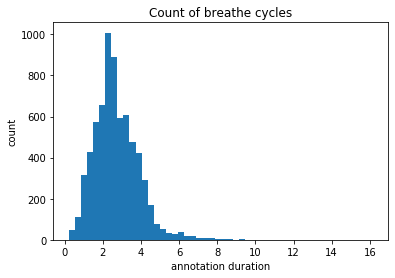

In [20]:
# plotting the duration of audio files
import matplotlib.pyplot as plt
plt.figure()
plt.hist(duration_list, bins = 50)
plt.xlabel('annotation duration')
plt.ylabel('count')#quantity
plt.title('Count of breathe cycles')
plt.show()

In [21]:
# Looking at some statistics of the annotations

print('longest cycle:{}'.format(max(duration_list)))
print('shortest cycle:{}'.format(min(duration_list)))
print('mean cycle:{}'.format(np.mean(duration_list)))
print('mean+2*std cycle:{}'.format(np.mean(duration_list)+2*np.std(duration_list)))

longest cycle:16.163
shortest cycle:0.20000000000000284
mean cycle:2.7005090852420994
mean+2*std cycle:5.045407366007572


If we look at the mean with 1 standard deviation, it only covers 64.8% of the data. Therefore, I took the mean with 2 standard deviations which covers 96.6% of the data.

In [22]:
# mean + 1 std
threshold =int(np.mean(duration_list)+np.std(duration_list))
print('Fraction of samples less than {} seconds:{}'.format(threshold, np.sum(duration_list < threshold)/len(duration_list)))

Fraction of samples less than 3 seconds:0.6480139170774137


In [23]:
threshold =int(np.mean(duration_list)+2*np.std(duration_list))
print('Fraction of samples less than {} seconds:{}'.format(threshold, np.sum(duration_list < threshold)/len(duration_list)))

Fraction of samples less than 5 seconds:0.9660771238040011


In the dataset, we have 126 patients but 920 .wav files.That means there are multiple audio files recorded from each patient. We have to match each audio file corresponding to each individual patient.

In [24]:
p_id_file = [] # patient IDs corresponding to each file

for name in filenames:

    p_id_file.append(int(name[:3])) # 3 because only the first 3 integers are ids

In [25]:
p_id_file

[101,
 101,
 102,
 103,
 104,
 104,
 104,
 104,
 104,
 104,
 105,
 106,
 106,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 108,
 109,
 109,
 109,
 109,
 109,
 109,
 110,
 110,
 110,
 110,
 110,
 111,
 111,
 112,
 112,
 112,
 112,
 112,
 113,
 113,
 113,
 113,
 113,
 113,
 114,
 114,
 114,
 114,
 114,
 115,
 116,
 116,
 117,
 117,
 118,
 118,
 118,
 118,
 118,
 118,
 119,
 120,
 120,
 120,
 120,
 120,
 121,
 121,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 123,
 124,
 124,
 124,
 124,
 124,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130,
 130

In [26]:
p_id_file = np.array(p_id_file) 

In [27]:
p_id_cndt = {} # patient IDs corresponding to each file # condition (diagnosis)

# diagnosis of each file/ patient

for i in range(df_diag.shape[0]):

    for j in range(p_id_file.shape[0]):

        if p_id_file[j]==df_diag['Patient number'][i]:

            p_id_cndt[j]=df_diag['Diagnosis'][i]

In [28]:
# join path data(audio files) and file names 
filepaths = [join(path_data, f) for f in filenames]


In [29]:
# label each patient id files with diagnosis
labels = np.array([df_diag[df_diag['Patient number'] == x]['Diagnosis'].values[0] for x in p_id_file]) # labels for audio files

In [30]:
labels

array(['URTI', 'URTI', 'Healthy', 'Asthma', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'URTI', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'LRTI', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'Bronchiectasis',
       'Bronchiectasis', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'LRTI', 'Bronchiectasis', 'Bronchiectasis', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'URTI',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'Healthy', 'Healthy',
       'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia',
       'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Healthy',
   

----

#### Pre-processing the Data

In [31]:
pattern='C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/audio_and_txt_files/*.wav'


In [32]:
import librosa
import glob
import scipy
# getting the sample rate
Row_data={}

samplerate={}

# List files

filelist = sorted(glob.glob(pattern))
# for each file

for idx, f in enumerate(filelist):

    #input file, read data

    data,S_R = librosa.load(f, res_type='kaiser_fast')

    data=pd.DataFrame(data)

    data=data.dropna()

    data=data.values

    data=data.astype('float64')

    data=data.reshape(len(data),)

    data=scipy.signal.detrend(data, axis=-1, type='linear')   # Finding and removing linear trends

    data=scipy.signal.medfilt(data)  # Applying a simple median filter

    Row_data[idx]=data

    samplerate[idx]=S_R


In [33]:
# taking the mean absolute deviation of signals
def maddest(Signal, axis=None):

    """

    Mean Absolute Deviation

    """

    return np.mean(np.absolute(Signal - np.mean(Signal, axis)), axis)

In [34]:
# wavelenght denoising of time signals
import pywt


def denoise_wvlt( x, wavelet, level):

    """

    1. Adapted from waveletSmooth function found here:

    http://connor-johnson.com/2016/01/24/using-pywavelets-to-remove-high-frequency-noise/

    2. Threshold equation and using hard mode in threshold as mentioned

    by Tomas Vantuch:

    http://dspace.vsb.cz/bitstream/handle/10084/133114/VAN431_FEI_P1807_1801V001_2018.pdf

    """

    

    # Decompose to get the wavelet coefficients

    coeff = pywt.wavedec( x, wavelet, mode="per" )
    
    # Calculate sigma for threshold as defined in http://dspace.vsb.cz/bitstream/handle/10084/133114/VAN431_FEI_P1807_1801V001_2018.pdf

    # As noted by @harshit92 MAD referred to in the paper is Mean Absolute Deviation not Median Absolute Deviation

    sigma = (1/0.6745) * maddest( coeff[-level] )

    # Calculte the univeral threshold

    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )

    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode='hard') for i in coeff[1:] )  

    # Reconstruct the signal using the thresholded coefficients

    return pywt.waverec( coeff, wavelet, mode='per' )



In [35]:
# https://pywavelets.readthedocs.io/en/latest/regression/wavelet.html -- for wavelet object determination
Data_Dnsd = []  # list of denoised data
for i in range(len(Row_data)):

    data= denoise_wvlt(Row_data[i],'db4',5)

    Data_Dnsd.append(data)


In [36]:
# root mean square envelope analysis performed window by window
def Envelope_rms(inputSignal, window_size):    

    a2 = np.power(inputSignal,2)

    window = np.ones(window_size)/float(window_size)

    Up=np.sqrt(np.convolve(a2, window, 'valid'))

    Down=-np.sqrt(np.convolve(a2, window, 'valid'))

    return Up,Down

In [37]:
Envelop_data = [] 

window_size=100

for i in range(len(Data_Dnsd)):
        data,down=Envelope_rms(Data_Dnsd[i],window_size)
        Envelop_data.append(data)

In [38]:
# splitting the data files of 20s duration into smaller files to handle some class imbalance and have more samples of each class

N_Data={}

Env_data_spl={}

Row_data_spl={}

labels_new=[]

p_id_new=[]

p_cndt_new = []


len_sec=20

pcs=int(len_sec/threshold)



for i in range(920):



    for j in range(pcs):

        N_Data={}

        N_Data[j]=Data_Dnsd[i][j*S_R:(j+1)*S_R]

        Row_data_spl[j+i*4]=N_Data[j]

        labels_new.append(labels[i])

        p_id_new.append(p_id_file[i])

        p_cndt_new.append(p_id_cndt[i])



p_id_new=np.array(p_id_new)

In [39]:
len(Row_data_spl)

3680

In [40]:
p_id_new

array([101, 101, 101, ..., 226, 226, 226])

In [41]:
path_s_features_s = 'C:/Users/Setareh Erfani/Desktop/S_features_s.xlsx'

S_features_s=pd.read_excel(path_s_features_s)
S_features_s=S_features_s.iloc[:,1:S_features_s.shape[1]]
S_features_s=S_features_s.values

In [42]:
S_features_s[4,:]

array([7.23128557e-01, 7.88016558e-01, 8.47579956e-01, ...,
       2.78375785e-04, 4.72198768e-02, 4.72195925e-02])

In [43]:
goal_features=S_features_s
goal_labels=np.array(labels_new)